In [ ]:
#a project using an autoencoder to explore latent representations of the MNIST handwritten digits dataset. You're to compress 28x28 grayscale images (784 pixels) into 32-dimensional vectors and reconstruct them.

# Python implementation using Keras:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.utils import plot_model


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Latent representation

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)  # For extracting 32D vectors


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3483 - val_loss: 0.1656
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1572 - val_loss: 0.1336
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1320 - val_loss: 0.1219
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1215 - val_loss: 0.1156
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1154 - val_loss: 0.1108
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1109 - val_loss: 0.1072
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1074 - val_loss: 0.1042
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1046 - val_loss: 0.1015
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1003 - val_loss: 0.0982
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


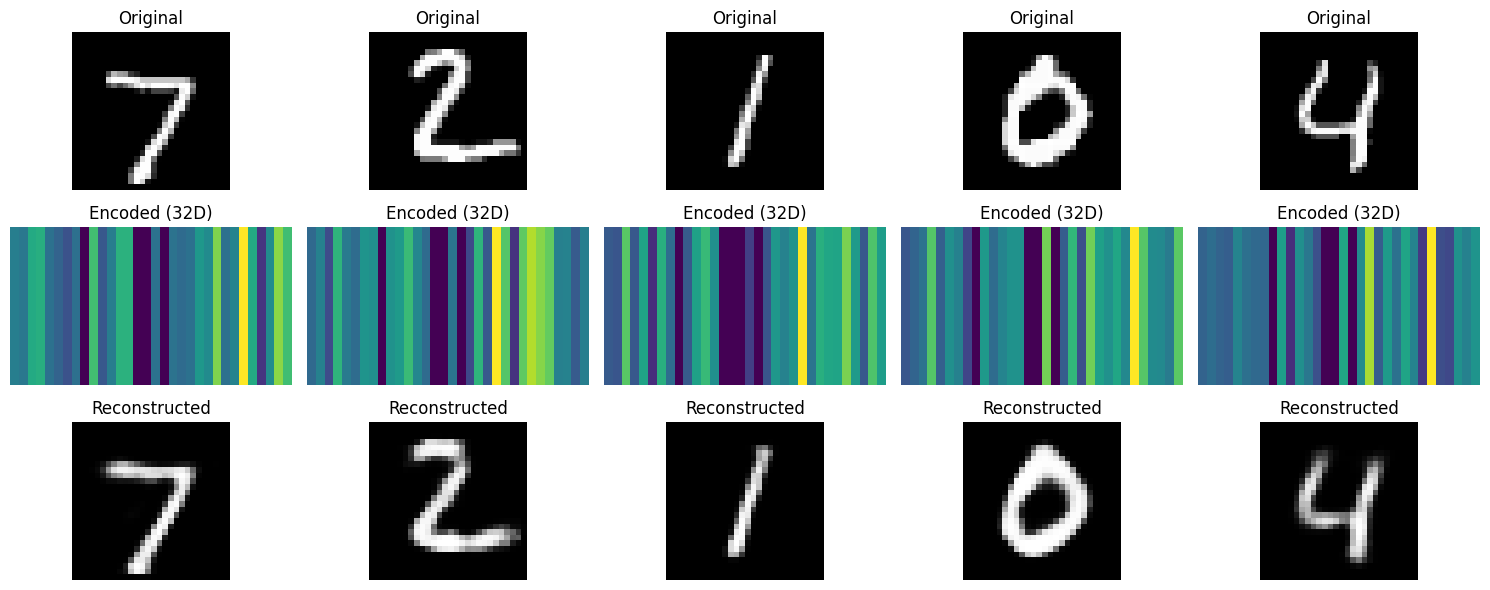

In [ ]:
encoded_imgs = encoder.predict(x_test[:5])
decoded_imgs = autoencoder.predict(x_test[:5])

plt.figure(figsize=(15, 6))
for i in range(5):
    # Original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Encoded Heatmap
    ax = plt.subplot(3, 5, i + 6)
    sns.heatmap(encoded_imgs[i].reshape(1, 32), cmap="viridis", cbar=False)
    plt.title("Encoded (32D)")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()
